# Многопоточность в C++

Иногда необходимо, чтобы некоторые процессы в программе выполнялись параллельно. 
В осуществлении этого может пригодиться многопоточность.

**Многопоточность** - свойство платформы или программы, заключающееся в том, что 
процесс этой программы может состоять из нескольких потоков, которые выполняются "параллельно", 
т. е. не имея определённого порядка выполнения во времени.

**Процесс** - экземпляр программы во время выполнения.

**Поток** - определённые части программы (кода), выполняющиеся без предаписанного порядка во времени.

## Как работает многопоточность?

Пусть имеются две задачи: 1 и 2.

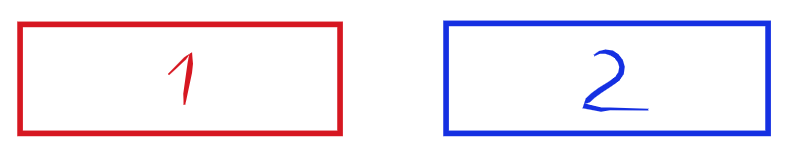

Если их выполнять последовательно, то получим, что сначала выполнится задача 1, а потом задача 2.

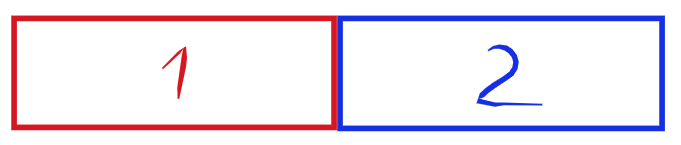

Если же использовать многопоточность, то задачи будут выполняться постепенно: 
сначала часть 1, потом часть 2, снова часть 1, а за ней часть 2...

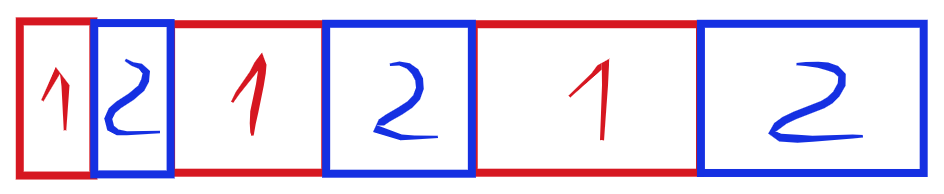

## Где используется многопоточность?

**Приложения с пользовательским интерфейсом.**

За работу интерфейса отвечает один поток, за вычисления - другие. 
Это позволяет интерфейсу не зависать во время вычислений.

**Ожидание.**

Пока одна часть программы ожидает чего-либо, другие могут выполняться, 
т. к. ожидаемая часть находится в другом потоке.

**Повышение производительности.**

Некоторые задачи следует разбивать на потоки для повышения производительности. 
Например, фильтрация каких-то данных разными фильтрами.

## Проблемы многопоточности

Конечно же, не всё идеально, 
поэтому за скорость и удобство приходится расплачиваться проблемами с синхронизацией. 
Например, одновременным доступом к объекту разными потоками.

Некоторые из проблем хорошо описаны на задачах, которые представлены ниже:

1) [Задача об обедающих философах](https://ru.wikipedia.org/wiki/Задача_об_обедающих_философах)

2) [Проблема спящего парикмахера](https://ru.wikipedia.org/wiki/Проблема_спящего_парикмахера)

3) [Задача о курильщиках](https://ru.wikipedia.org/wiki/Задача_о_курильщиках)

4) [Задача о читателях-писателях](https://ru.wikipedia.org/wiki/Задача_о_читателях-писателях)

## Работа с многопоточностью в C++

Наконец-то от теории перешли к практике.

Для начала, чтобы работать с многопоточностью, необходимо добавить в файл CMakeLists.txt строки: 
```CMake
find_package(Threads REQUIRED)
target_link_libraries(${PROJECT_NAME} Threads::Threads)
```

Далее необходимо включить модуль **thread**.

In [2]:
#include <thread>

Чтобы создать поток, нужно инициализировать экземпляр класса **[std::thread](https://en.cppreference.com/w/cpp/thread/thread)**.

Этот класс принимает функтор (то, что можно вызвать) и аргументы, которые передаются в этот функтор, если необходимо.

In [7]:
#include <iostream>
using namespace std;

In [8]:
void some_functor() {
    cout << 123 << endl;
}

In [9]:
thread some_thread(some_functor);

123


In [10]:
some_thread.join();

Вызов *some_thread.join()* блокирует текущий поток, пока вызываемый поток (some_thread) не выполнится. 
Она используется для контроля окончания работы потока.

Как правило функции для потоков имеют тип *void*, 
т. к. возвращаемое ей значение в любом случае будет проигнорировано.

Если функция имеет аргументы, то они передаются в конструктор класса *std::thread*.

In [11]:
void thread_func(int arg1, int arg2) {
    cout << arg1 + arg2 << endl;
}

In [12]:
thread my_thread(thread_func, 4, 1);

5


In [13]:
my_thread.join();

Если функция принимает аргументы по ссылке, то в потом нужно передавать аргумент через 
**[std::ref или std::cref](https://en.cppreference.com/w/cpp/utility/functional/ref)**.

In [18]:
void thread_func(int &x) {
    cout << x << endl;
}

In [19]:
#include <functional> // для использования std::ref

In [20]:
int arg = 10;

thread thr(thread_func, std::ref(arg));

input_line_28:3:8: error: no matching constructor for initialization of 'std::thread'
thread thr(thread_func, std::ref(arg));
       ^   ~~~~~~~~~~~~~~~~~~~~~~~~~~
/home/alexfives/anaconda3/envs/jupyter_cpp/bin/../lib/gcc/x86_64-conda-linux-gnu/9.3.0/../../../../x86_64-conda-linux-gnu/include/c++/9.3.0/thread:117:7: note: candidate template ignored: couldn't infer template argument '_Callable'
      thread(_Callable&& __f, _Args&&... __args)
      ^
/home/alexfives/anaconda3/envs/jupyter_cpp/bin/../lib/gcc/x86_64-conda-linux-gnu/9.3.0/../../../../x86_64-conda-linux-gnu/include/c++/9.3.0/thread:142:5: note: candidate constructor not viable: requires 1 argument, but 2 were provided
    thread(const thread&) = delete;
    ^
/home/alexfives/anaconda3/envs/jupyter_cpp/bin/../lib/gcc/x86_64-conda-linux-gnu/9.3.0/../../../../x86_64-conda-linux-gnu/include/c++/9.3.0/thread:144:5: note: candidate constructor not viable: requires single argument '__t', but 2 arguments were provided
    thread(th

Interpreter Error: 

Также поток можно "отсоединить" методом **detach()**. После вызова этого метода поток начинает работать "на фоне", пока не завершится. К нему уже нельзя подключиться методом *.join()*.

Исключения в потоках не будут отправляться в основной поток, поэтому их необходимо обрабатывать внутри потока.

In [21]:
void thread_func() {
    throw 1;
}

In [26]:
// такое не работает
try {
    thread thr(thread_func);
}
catch (int) {
    cout << "exception" << endl;
}

thr.join();

input_line_34:4:12: error: no matching constructor for initialization of 'std::thread'
    thread thr(thread_func);
           ^   ~~~~~~~~~~~
/home/alexfives/anaconda3/envs/jupyter_cpp/bin/../lib/gcc/x86_64-conda-linux-gnu/9.3.0/../../../../x86_64-conda-linux-gnu/include/c++/9.3.0/thread:142:5: note: candidate constructor not viable: no overload of 'thread_func' matching 'const std::thread' for 1st argument
    thread(const thread&) = delete;
    ^
/home/alexfives/anaconda3/envs/jupyter_cpp/bin/../lib/gcc/x86_64-conda-linux-gnu/9.3.0/../../../../x86_64-conda-linux-gnu/include/c++/9.3.0/thread:144:5: note: candidate constructor not viable: no overload of 'thread_func' matching 'std::thread' for 1st argument
    thread(thread&& __t) noexcept
    ^
/home/alexfives/anaconda3/envs/jupyter_cpp/bin/../lib/gcc/x86_64-conda-linux-gnu/9.3.0/../../../../x86_64-conda-linux-gnu/include/c++/9.3.0/thread:117:7: note: candidate template ignored: couldn't infer template argument '_Callable'
      thre

Interpreter Error: 

In [24]:
// правильное решение
void thread_func() {
    try {
        throw 1;
    }
    catch (...) {
        cout << "exception" << endl;
    }
}

In file included from input_line_5:1:
In file included from /home/alexfives/anaconda3/envs/jupyter_cpp/include/xeus/xinterpreter.hpp:17:
In file included from /home/alexfives/anaconda3/envs/jupyter_cpp/include/xeus/xcomm.hpp:19:
In file included from /home/alexfives/anaconda3/envs/jupyter_cpp/include/nlohmann/json.hpp:42:
In file included from /home/alexfives/anaconda3/envs/jupyter_cpp/bin/../lib/gcc/x86_64-conda-linux-gnu/9.3.0/../../../../x86_64-conda-linux-gnu/include/c++/9.3.0/iterator:64:
/home/alexfives/anaconda3/envs/jupyter_cpp/bin/../lib/gcc/x86_64-conda-linux-gnu/9.3.0/../../../../x86_64-conda-linux-gnu/include/c++/9.3.0/ostream:568:8: error: no member named 'setstate' in 'std::basic_ostream<char>'
        __out.setstate(ios_base::badbit);
        ~~~~~ ^
input_line_32:7:14: note: in instantiation of function template specialization 'std::operator<<<std::char_traits<char> >' requested here
        cout << "exception" << endl;
             ^


Interpreter Error: 

In [27]:
thread thr(thread_func);

thr.join();

input_line_35:2:9: error: no matching constructor for initialization of 'std::thread'
 thread thr(thread_func);
        ^   ~~~~~~~~~~~
/home/alexfives/anaconda3/envs/jupyter_cpp/bin/../lib/gcc/x86_64-conda-linux-gnu/9.3.0/../../../../x86_64-conda-linux-gnu/include/c++/9.3.0/thread:142:5: note: candidate constructor not viable: no overload of 'thread_func' matching 'const std::thread' for 1st argument
    thread(const thread&) = delete;
    ^
/home/alexfives/anaconda3/envs/jupyter_cpp/bin/../lib/gcc/x86_64-conda-linux-gnu/9.3.0/../../../../x86_64-conda-linux-gnu/include/c++/9.3.0/thread:144:5: note: candidate constructor not viable: no overload of 'thread_func' matching 'std::thread' for 1st argument
    thread(thread&& __t) noexcept
    ^
/home/alexfives/anaconda3/envs/jupyter_cpp/bin/../lib/gcc/x86_64-conda-linux-gnu/9.3.0/../../../../x86_64-conda-linux-gnu/include/c++/9.3.0/thread:117:7: note: candidate template ignored: couldn't infer template argument '_Callable'
      thread(_Cal

Interpreter Error: 

### Доступ к данным и блокировки

Предположим, у нас есть 2 потока, которые в цикле увеличивают значение одной переменной *X* на 1.

Что может пойти не так?

In [52]:
int X = 0;

In [53]:
void incX(int n) {
    for (int i = 0; i < n; i++) ::X++;
}

In [54]:
thread t1(incX, 1'000'000);

thread t2(incX, 2'000'000);

t1.join();
t2.join();

1 000 000 + 2 000 000 = 3 000 000, значит, после завершения работы потоков значение переменной *X* должно равняться 3 000 000.

In [55]:
cout << X;

2043636

<font color='#EDF2F3'>~~С хуя ли?~~</font>

**Почему не 3 000 000?**

Что происходит на самом деле:

На каждом шаге цикла в *incX* происходят 3 действия:
```
1) Считывается значение X
2) Значение X увеличивается на 1
3) Записывается новое значение X
```

Выполнение потока может остановиться в любой момент, поэтому можем получить такую ситуацию:

<font color='red'>Красный</font> - первый поток,
<font color='blue'>синий</font> - второй поток.

<font color='red'>1) Считал, увеличил, записал.</font>

<font color='red'>1) Считал, увеличил, записал.</font>

<font color='blue'>2) Считал, увеличил, записал.</font>

<font color='blue'>2) Считал, увеличил, записал.</font>

...

...

<font color='red'>1) Считал, увеличил, </font>

<font color='blue'>2) Считал, увеличил, записал.</font>

<font color='blue'>2) Считал, увеличил, записал.</font>

...

<font color='red'>1) записал.</font>

...

...

Тогда, начиная с момента, на котором шаг цикла недовыполнился, начнётся сбой, 
т. к. в *X* запишутся изменения первого потока, а это значит, что те изменения, 
которые были внесены в *X* в результате выполнения второго потока исчезнут.

#### Как решить?

Для этого используются блокировки (примитивы синхронизации), 
самая простейшая - **[mutex](https://en.cppreference.com/w/cpp/thread/mutex)**.

Смысл блокировок прост: если один поток получил доступ к какому-то объекту, 
то другие потоки не могут получить доступ к этому объекту, пока он заблокирован первым потоком.

Реализация той же задачи с блокировкой:

In [57]:
#include <mutex> // включаем заголовочный файл блокировки mutex

In [63]:
int X = 0;

mutex BLOCK; // инициализируем глобальную переменную блокировки

In [64]:
void incX(int n) {
    for (int i = 0; i < n; i++) {
        ::BLOCK.lock(); // устанавливаем блокировку
        ::X++;
        ::BLOCK.unlock(); // снимаем блокировку
    }
}

In [65]:
thread t1(incX, 1'000'000);

thread t2(incX, 2'000'000);

t1.join();
t2.join();

In [66]:
cout << X;

3000000

Получили 3 000 000, как и предполагалось.

Также управлять блокировкой можно с помощью класса **lock_guard**.

lock_guard устанавливает блокировку на мьютекс при инициализации 
и снимает с них блокировку при уничтожении объекта класса.

На замену lock_guard пришёл новый усовершенствованный класс **scoped_lock**, 
который может блокировать произвольное количество мьютексов и работать 
с новыми типами блокировки (как recursive_mutex, timed_mutex...).

In [80]:
int X = 0;

mutex BLOCK;

In [81]:
void incX(int n) {
    mutex BLOCK2; // useless
    for (int i = 0; i < n; i++) {
        scoped_lock lg{::BLOCK, BLOCK2};
        ::X++;
    }
}

input_line_89:4:9: error: unknown type name 'scoped_lock'; did you mean '__gnu_cxx::__scoped_lock'?
        scoped_lock lg{::BLOCK, BLOCK2};
        ^~~~~~~~~~~
        __gnu_cxx::__scoped_lock
/home/alexfives/anaconda3/envs/jupyter_cpp/bin/../lib/gcc/x86_64-conda-linux-gnu/9.3.0/../../../../x86_64-conda-linux-gnu/include/c++/9.3.0/ext/concurrence.h:228:9: note: '__gnu_cxx::__scoped_lock' declared here
  class __scoped_lock
        ^
input_line_89:4:21: error: no matching constructor for initialization of '__gnu_cxx::__scoped_lock'
        scoped_lock lg{::BLOCK, BLOCK2};
                    ^ ~~~~~~~~~~~~~~~~~
/home/alexfives/anaconda3/envs/jupyter_cpp/bin/../lib/gcc/x86_64-conda-linux-gnu/9.3.0/../../../../x86_64-conda-linux-gnu/include/c++/9.3.0/ext/concurrence.h:236:5: note: candidate constructor not viable: requires 1 argument, but 2 were provided
    __scoped_lock(const __scoped_lock&);
    ^
/home/alexfives/anaconda3/envs/jupyter_cpp/bin/../lib/gcc/x86_64-conda-linux-gnu/9.3.0/.

Interpreter Error: 

In [82]:
void incX(int n) {
    for (int i = 0; i < n; i++) {
        lock_guard<mutex> lg{::BLOCK};
        ::X++;
    }
}

In [83]:
thread t1(incX, 1'000'000);

thread t2(incX, 2'000'000);

t1.join();
t2.join();

In [84]:
cout << X;

3000000

Но вместе с решением одной проблемы блокировка несёт новые.

#### Deadlock

Это ситуация, при которой несколько потоков находятся в состоянии ожидания ресурсов, 
занятых друг другом, и ни один из них не может продолжать выполнение.

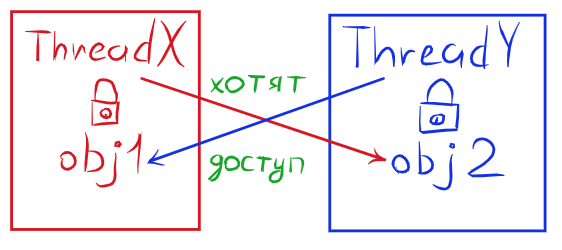

Получается ситуация:

<font color="red">ThreadX</font> перестанет работать с <font color="red">obj1</font> 
и переключится на <font color="blue">obj2</font>, 
когда <font color="blue">ThreadY</font> перестанет работать с <font color="blue">obj2</font> 
и переключится на <font color="red">obj1</font>.

А <font color="blue">ThreadY</font> перестанет работать с <font color="blue">obj2</font> 
и переключится на <font color="red">obj1</font>, 
когда <font color="red">ThreadX</font> перестанет работать с <font color="red">obj1</font> 
и переключится на <font color="blue">obj2</font>.

...

Простой пример deadlock'a:

In [86]:
mutex BLOCK1;
mutex BLOCK2;

mutex PRINT_BLOCK; // для нормального вывода, к deadlock'у отношения не имеет

In [89]:
#include <string>

In [91]:
void print_func(string str) {
    // тоже к deadlock'у отношения не имеет, 
    // просто выводит то, что нужно в условиях многопоточности
    ::PRINT_BLOCK.lock();
    cout << str << endl;
    ::PRINT_BLOCK.unlock();
}

Функции для потоков, здесь и происходят deadlock'и.

In [92]:
void func1() {
    lock_guard<mutex> lg1{::BLOCK1};
    print_func("func1 started");
    lock_guard<mutex> lg2{::BLOCK2};
    print_func("func1 ended");
}

In [93]:
void func2() {
    lock_guard<mutex> lg1{::BLOCK2};
    print_func("func2 started");
    lock_guard<mutex> lg2{::BLOCK1};
    print_func("func2 ended");
}

In [ ]:
thread thr1(func1);
thread thr2(func2);
thr1.join();
thr2.join();

func1 started
func2 started


Как видим, потоки не завершились, они находятся в бесконечном цикле.

##### Как решить?

В простых случаях может помочь граммотное использование блокировки.

In [ ]:
mutex BLOCK1;
mutex BLOCK2;

In [ ]:
void func1() {
    ::BLOCK1.lock();
    print_func("func1 started");
    ::BLOCK1.unlock();
    ::BLOCK2.lock();
    print_func("func1 ended");
    ::BLOCK2.unlock();
}

In [ ]:
void func2() {
    ::BLOCK2.lock();
    print_func("func2 started");
    ::BLOCK2.unlock();
    ::BLOCK1.lock();
    print_func("func2 ended");
    ::BLOCK1.unlock();
}

In [ ]:
thread thr1(func1);
thread thr2(func2);
thr1.join();
thr2.join();

Также можно устанавливать блокировки в одном порядке:

In [ ]:
mutex BLOCK1;
mutex BLOCK2;

In [ ]:
void func1() {
    lock_guard<mutex> lg1{::BLOCK1};
    print_func("func1 started");
    lock_guard<mutex> lg2{::BLOCK2};
    print_func("func1 ended");
}

In [ ]:
void func2() {
    lock_guard<mutex> lg1{::BLOCK1};
    print_func("func2 started");
    lock_guard<mutex> lg2{::BLOCK2};
    print_func("func2 ended");
}

In [ ]:
thread thr1(func1);
thread thr2(func2);
thr1.join();
thr2.join();

В более сложных - использование усовершенствованных блокировок: 
**[timed_mutex](https://en.cppreference.com/w/cpp/thread/timed_mutex)**, 
**[recursive_mutex](https://en.cppreference.com/w/cpp/thread/recursive_mutex)**, 
**[recursive_timed_mutex](https://en.cppreference.com/w/cpp/thread/recursive_timed_mutex)**...

По сути все они снимают блокировку при какому-то условии.